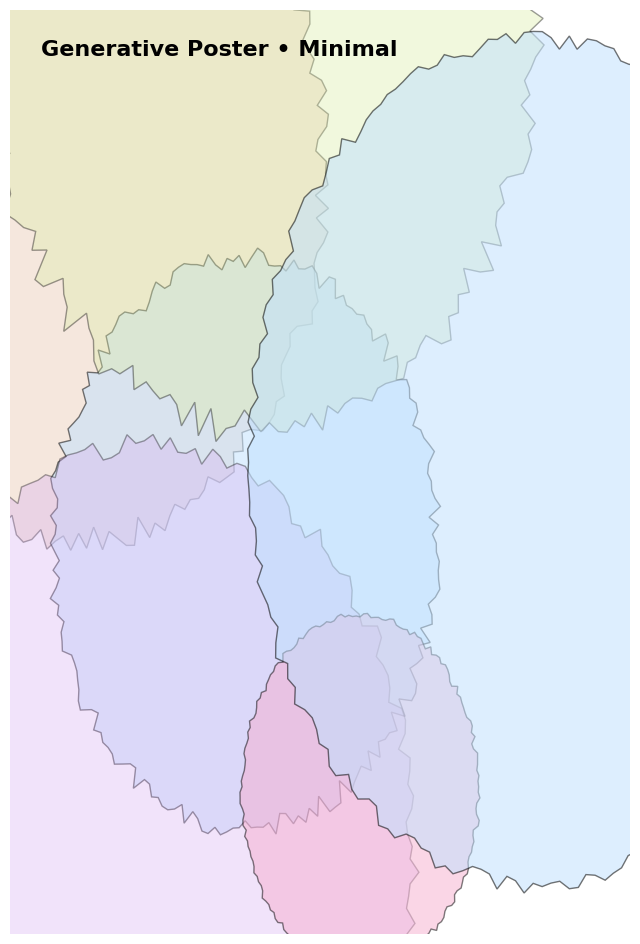

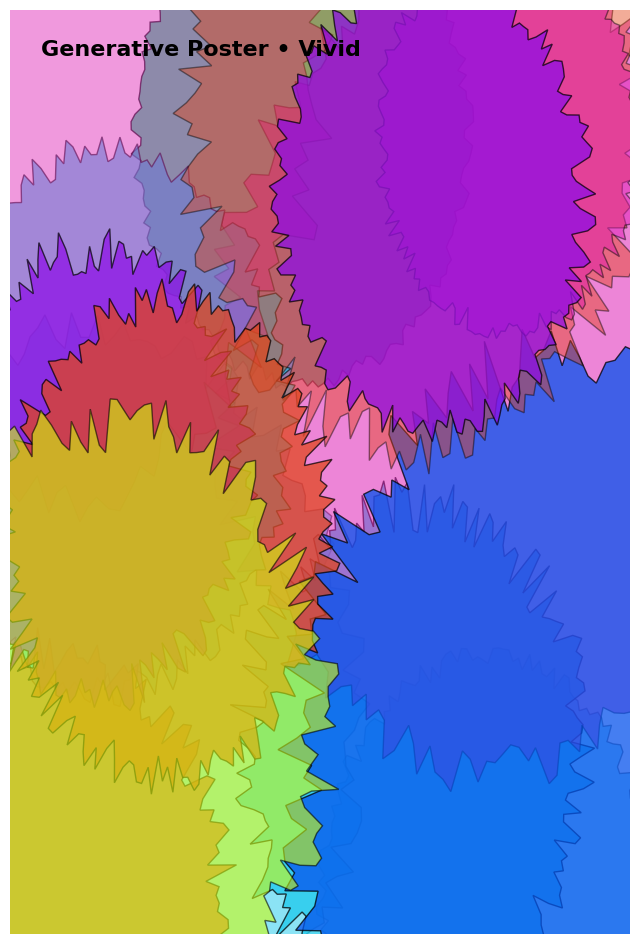

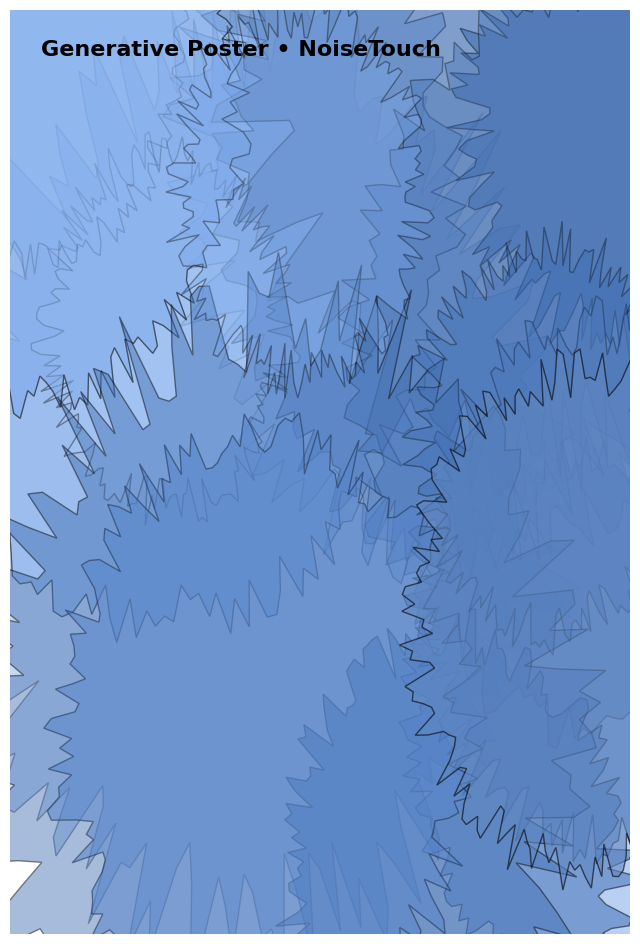

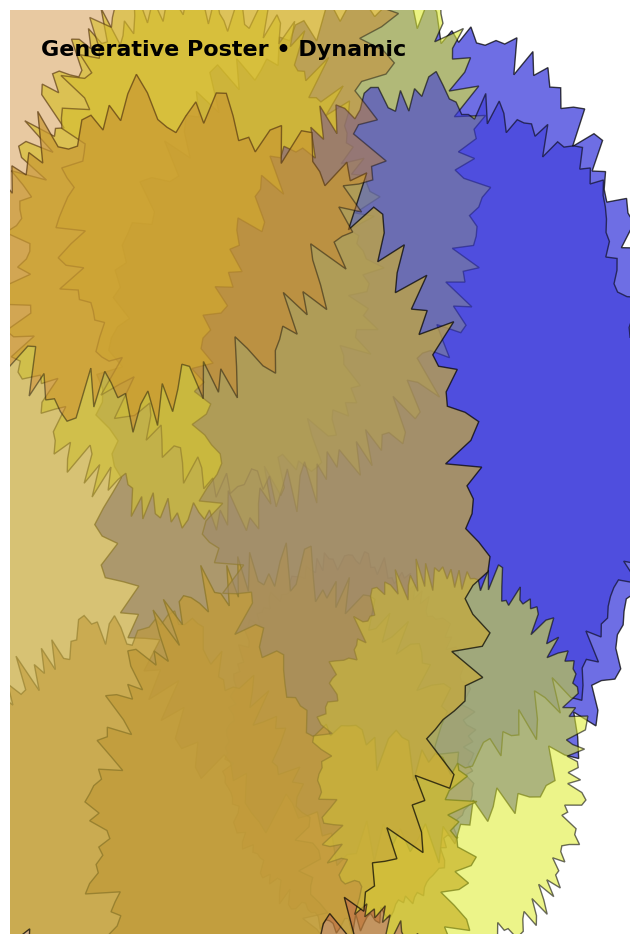

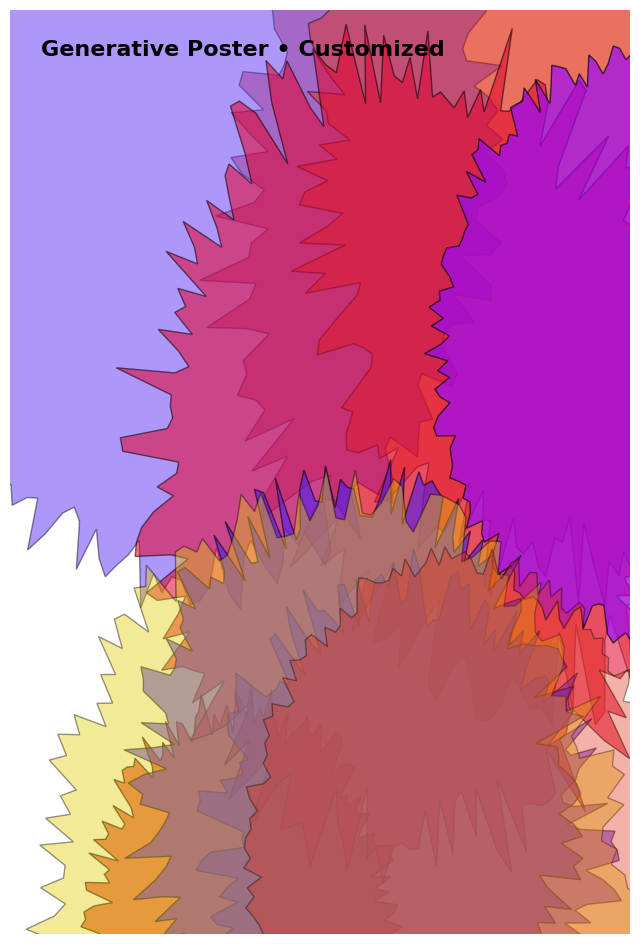

In [ ]:
import random, math
import numpy as np
from matplotlib.colors import hsv_to_rgb
import matplotlib.pyplot as plt

def blob(center=(0.5, 0.5), r=0.3, points=200, wobble=0.15):
    """Generate a wobbly closed shape around a center with base radius r."""
    angles = np.linspace(0, 2*math.pi, points, endpoint=False)
    radii  = r * (1 + wobble*(np.random.rand(points)-0.5))
    x = center[0] + radii * np.cos(angles)
    y = center[1] + radii * np.sin(angles)
    return x, y

def make_palette(k=6, mode="random", base_h=0.60):
    """Return k colors (RGB) by sampling HSV depending on mode."""
    cols = []
    for _ in range(k):
        if mode == "pastel":
            h = random.random(); s = random.uniform(0.20, 0.40); v = random.uniform(0.90, 1.00)
        elif mode == "vivid":
            h = random.random(); s = random.uniform(0.85, 1.00); v = random.uniform(0.85, 1.00)
        elif mode == "mono":
            h = base_h;         s = random.uniform(0.30, 0.70); v = random.uniform(0.60, 1.00)
        else:
            h = random.random(); s = random.uniform(0.50, 1.00); v = random.uniform(0.70, 1.00)
        cols.append(tuple(hsv_to_rgb([h, s, v])))
    return cols

STYLE_PRESETS = {
    "Minimal":    dict(n_layers=6,  wobble_range=(0.03,0.10), alpha_range=(0.35,0.55), palette_mode="pastel"),
    "Vivid":      dict(n_layers=15, wobble_range=(0.07,0.25), alpha_range=(0.40,0.75), palette_mode="vivid"),
    "NoiseTouch": dict(n_layers=18, wobble_range=(0.15,0.35), alpha_range=(0.30,0.60), palette_mode="mono"),
    "Dynamic":    dict(n_layers=10, wobble_range=(0.10,0.28), alpha_range=(0.40,0.80), palette_mode="random"),
}

def generate_poster(style=None, seed=None, save_path=None, dpi=300,
                    n_layers=10,
                    radius_range=(0.18, 0.50),
                    wobble_range=(0.08, 0.30),
                    alpha_range=(0.30, 0.7),
                    figsize=(8,12),
                    background=(0.95,0.95,0.94),
                    palette_mode="vivid"):
    """Create a generative poster with optional style, seed, and export."""
    if style in STYLE_PRESETS:
        preset = STYLE_PRESETS[style]
        n_layers     = preset.get("n_layers", n_layers)
        wobble_range = preset.get("wobble_range", wobble_range)
        alpha_range  = preset.get("alpha_range", alpha_range)
        palette_mode = preset.get("palette_mode", palette_mode)

    if seed is not None:
        random.seed(seed); np.random.seed(seed)

    # Canvas
    plt.figure(figsize=figsize)
    ax = plt.gca()
    ax.axis('off')
    ax.set_facecolor(background)

    palette = make_palette(8, mode=palette_mode)

    for _ in range(n_layers):
        cx, cy = random.random(), random.random()
        rr  = random.uniform(*radius_range)
        wob = random.uniform(*wobble_range)
        x, y = blob(center=(cx, cy), r=rr, wobble=wob)
        color = random.choice(palette)
        alpha = random.uniform(*alpha_range)
        ax.fill(x, y, color=color, alpha=alpha, edgecolor=(0,0,0,0))

    ax.text(0.05, 0.95, f"Generative Poster • {style or 'Customized'}",
            fontsize=16, weight='bold', transform=ax.transAxes)
    ax.set_xlim(0,1); ax.set_ylim(0,1)

    fig = plt.gcf()
    if save_path:
        fig.savefig(save_path, dpi=dpi, bbox_inches="tight", pad_inches=0.1)
    return fig, ax

generate_poster(style="Minimal",    seed=101, save_path="poster_minimal_v2.png")
generate_poster(style="Vivid",      seed=202, save_path="poster_vivid_v2.png")
generate_poster(style="NoiseTouch", seed=303, save_path="poster_noise_v2.png")
generate_poster(style="Dynamic",    seed=404, save_path="poster_dynamic.png")
generate_poster(seed=505, save_path="poster_custom_params.png")

plt.show()